In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties as FP
import warnings
import math

In [3]:
# font
fs = 10
FS_label = fs
Axis_FS =fs-1
LEG_FS = fs-2
Annotation_FS = fs-0.5

# tick line width
width_major = 0.4
width_minor = 0.2
LW = np.arange(0, 3.0, 0.25)

# data control
InsCase = 0 # 0 -> Case A(25 cm) # 1 -> Case B(30 cm)
path1 = "output_summer"

# annotation
subplot_no = list(map(chr,range(97,123)))
case_name = ['alpha=0.5', 'alpha=2.0', 'alpha=3.5', 'alpha=5.0']

# unit change 
day_to_hour = 24
hour_to_min = 60
hour_to_sec = 3600
min_to_sec = 60  
sec_to_hour = 1/3600        
J2kJ = 1/1000

# set timestep, duration
t_step = 10 #[s] 
PSTime = 120 #[h] PS: PreSimulation 
TSTime = 144 #[h] TS: TotalSimulation
simulation_time = TSTime - PSTime # [h]
PSTimeRowNum = int(PSTime*hour_to_sec/t_step)
TSTimeRowNum = int((TSTime)*hour_to_sec/t_step)
STimeRowNum = TSTimeRowNum-PSTimeRowNum
t_row_end = int((TSTime)*hour_to_sec/t_step) # 시간 행
t_list = [t_step*i for i in range(t_row_end+1)] #index 0 부터 시작 -> t_row_end+1
time = pd.DataFrame(t_list) #second
time_min = time/60; #minute
time_hour = time/3600; #hour
time_end = time_hour[-1:];    # last time

def cm2in(value):
    return value/2.54
def list_sec_to_hour(list):
    return([list[i]*sec_to_hour for i in range(len(list))])

In [4]:
# Num->length, a,b,c,d->alpha
# Unsteady
# U_Xc1_a=pd.read_excel("alpha=0.5/DF_U_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
U_Xc2_a=pd.read_excel("alpha=0.5/DF_U_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# U_Xc3_a=pd.read_excel("alpha=0.5/DF_U_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

# U_Xc1_b=pd.read_excel("alpha=1.0/DF_U_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
U_Xc2_b=pd.read_excel("alpha=1.0/DF_U_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# U_Xc3_b=pd.read_excel("alpha=1.0/DF_U_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

# U_Xc1_c=pd.read_excel("alpha=2.0/DF_U_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
U_Xc2_c=pd.read_excel("alpha=2.0/DF_U_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# U_Xc3_c=pd.read_excel("alpha=2.0/DF_U_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

# Dynamic
# D_Xc1_a=pd.read_excel("alpha=0.5/DF_D_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
D_Xc2_a=pd.read_excel("alpha=0.5/DF_D_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# D_Xc3_a=pd.read_excel("alpha=0.5/DF_D_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

# D_Xc1_b=pd.read_excel("alpha=1.0/DF_D_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
# D_Xc2_b=pd.read_excel("alpha=1.0/DF_D_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# D_Xc3_b=pd.read_excel("alpha=1.0/DF_D_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

# D_Xc1_c=pd.read_excel("alpha=2.0/DF_D_XcRate.xlsx", sheet_name="5 cm").cumsum()*J2kJ*t_step
# D_Xc2_c=pd.read_excel("alpha=2.0/DF_D_XcRate.xlsx", sheet_name="20 cm").cumsum()*J2kJ*t_step
# D_Xc3_c=pd.read_excel("alpha=2.0/DF_D_XcRate.xlsx", sheet_name="35 cm").cumsum()*J2kJ*t_step

In [5]:
DF_list=[U_Xc2_a,U_Xc2_b,U_Xc2_c,D_Xc2_a]

In [8]:
print(U_Xc2_a.max().max()/D_Xc2_a.max().max())
print(U_Xc2_b.max().max()/D_Xc2_a.max().max())
print(U_Xc2_c.max().max()/D_Xc2_a.max().max())
print(D_Xc2_a.max().max())

1.6103500375979232
1.1878670106773532
1.0499805031451166
73.82021487485157


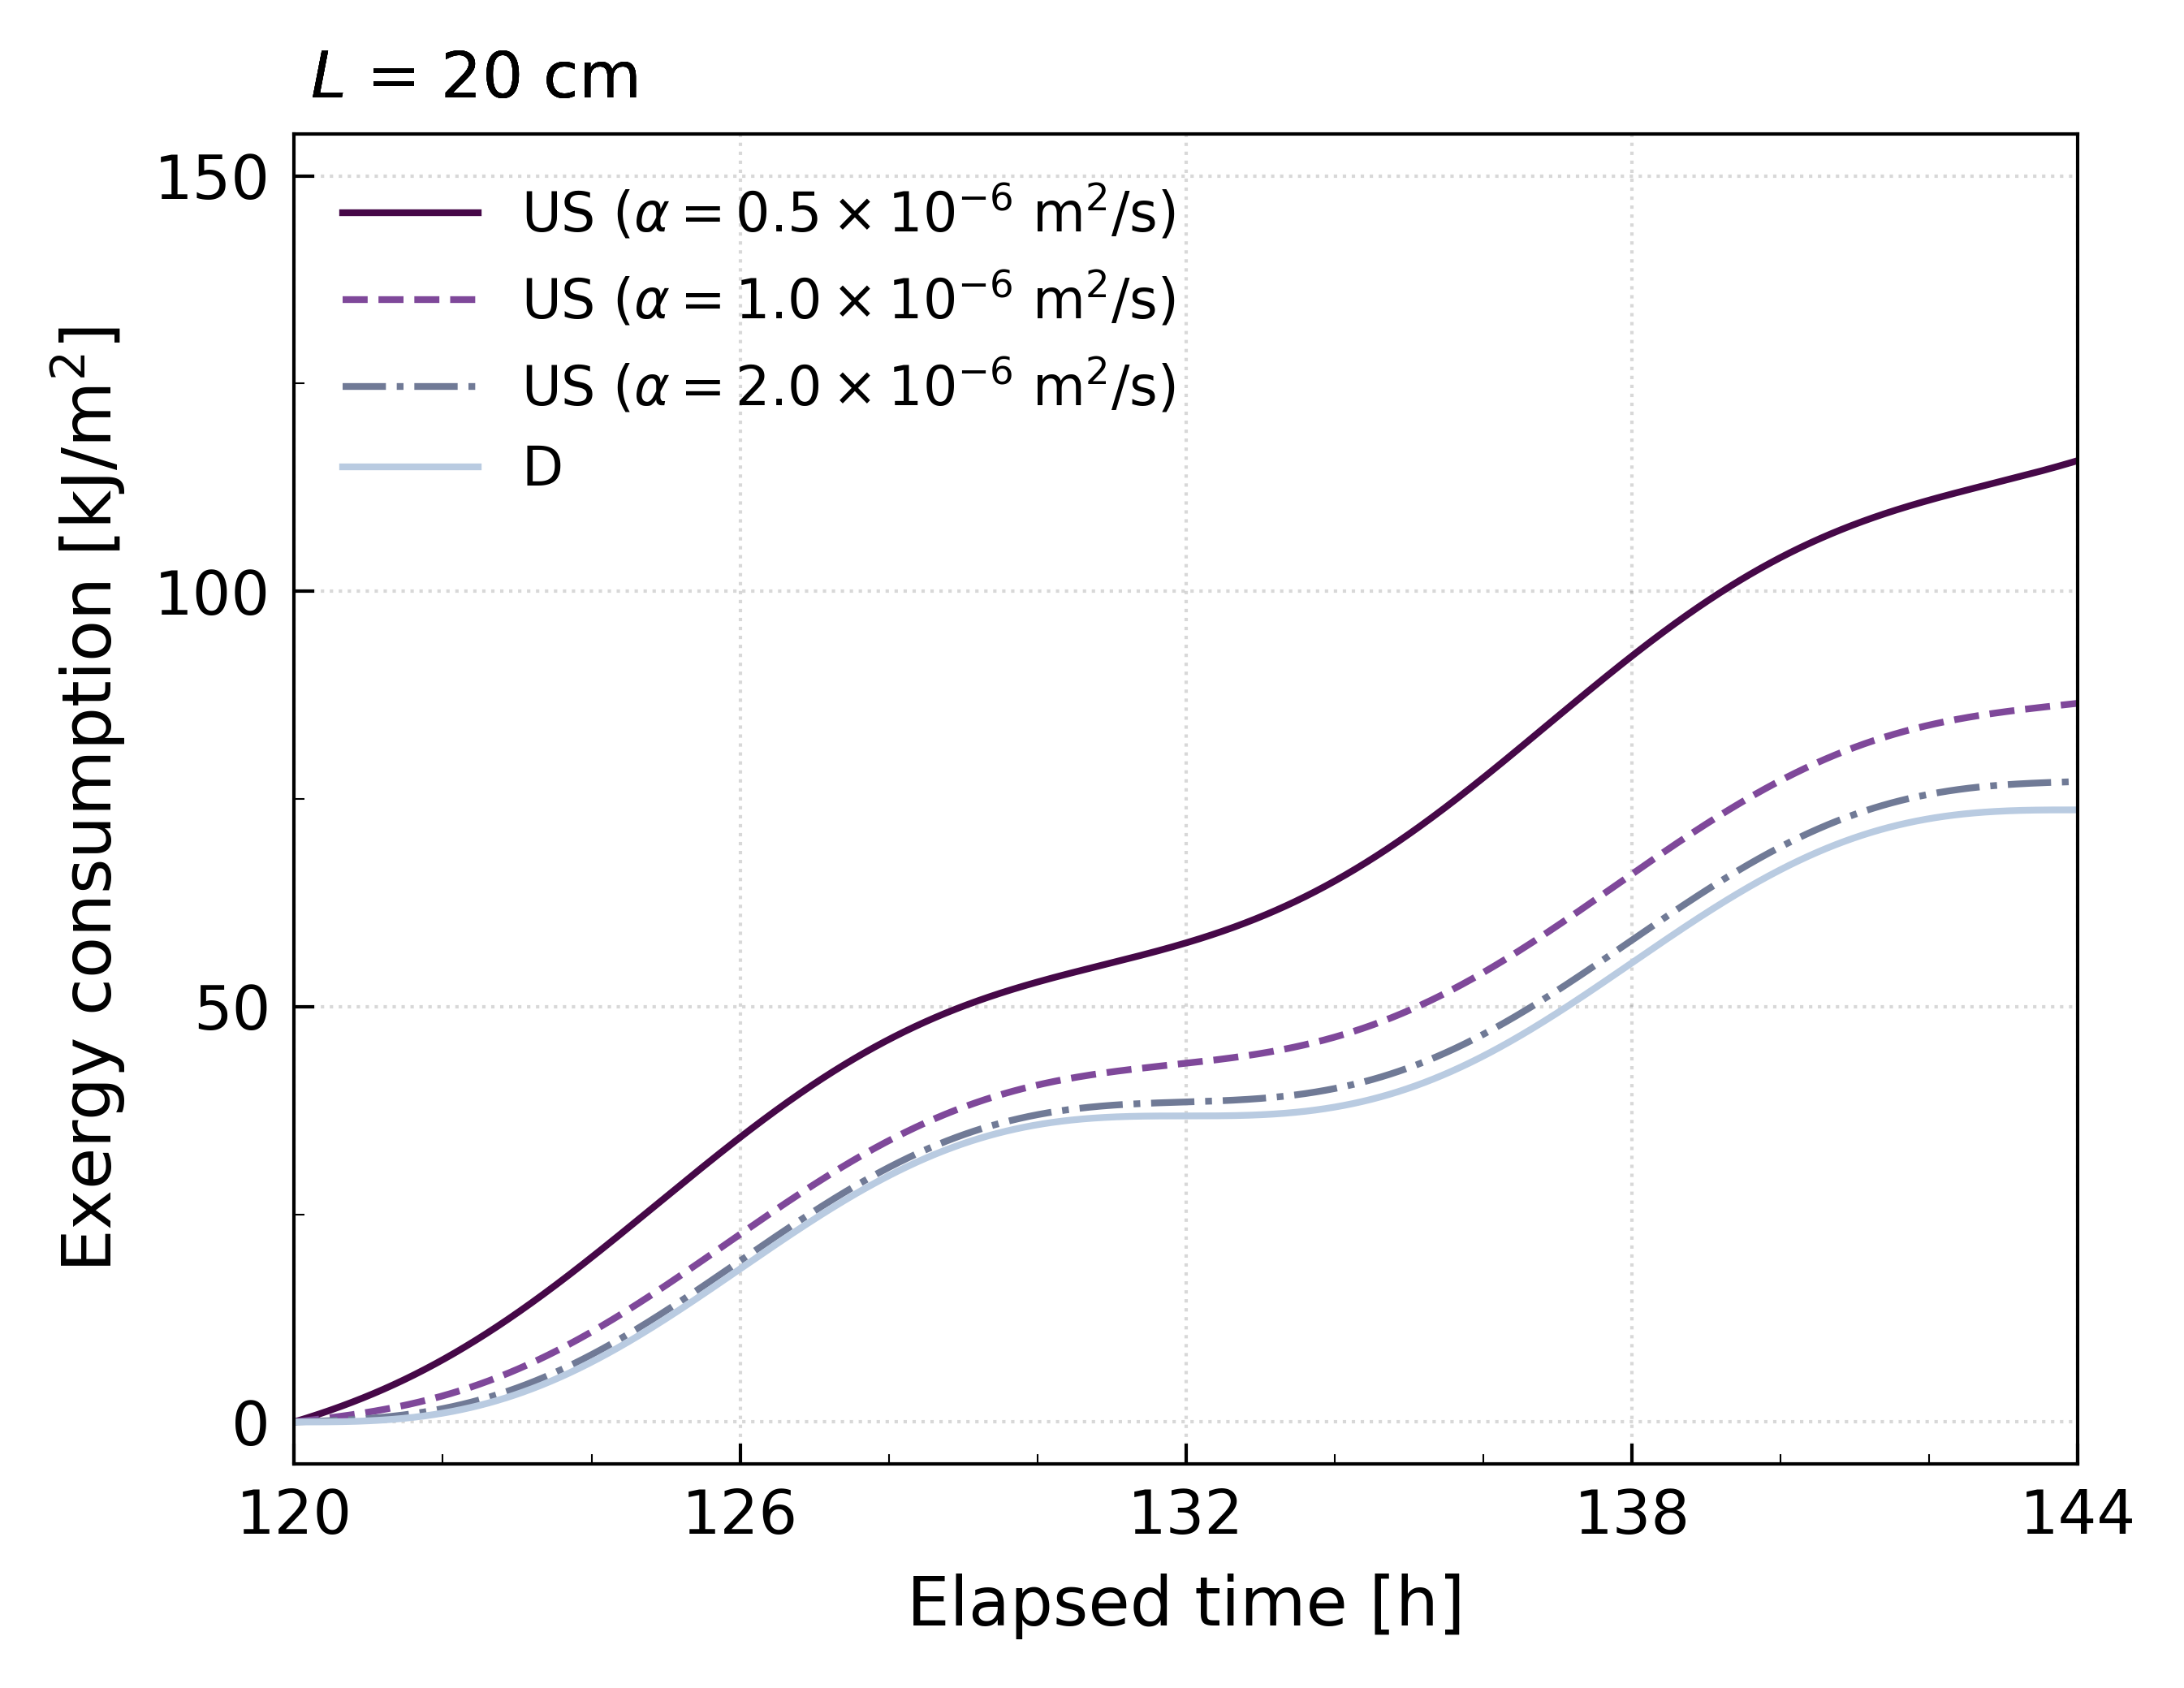

In [41]:
# limit, interval
nrows = 1
ncols = 1
nfigs = nrows*ncols

fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=True, sharey=False, 
    figsize=(cm2in(12), cm2in(9)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    )

X = time_hour[PSTimeRowNum:]
Y = DF_list

# tick settings 
xmax =  [144]*nfigs 
xmin =  [120]*nfigs 
xint =  [6]*nfigs 
xmar =  [0]*nfigs
xtick = [3]*nfigs

ymax = [150,200,200]*nrows
ymin = [0]*nfigs
yint = [50,50,50]*nrows
ymar = [5,10,10]*nfigs
ytick = [2,2,2]*nrows

xlabel = [""]*(nfigs-ncols)+["Elapsed time [h]"]*ncols
ylabel = [r'Exergy consumption $\mathrm{[kJ/m^2]}$','','']*nrows
legend_list = [r'US ($\mathit{\alpha}= 0.5\times 10^{-6}~\mathrm{m^2/s}$)',
               r'US ($\mathit{\alpha}= 1.0\times 10^{-6}~\mathrm{m^2/s}$)',
               r'US ($\mathit{\alpha}= 2.0\times 10^{-6}~\mathrm{m^2/s}$)',
               'D']
line_list = ['-','--','-.','-']

color = ["#460848", "#7f489a","#707a96", "#b9cbe1"]

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for nidx in range(4):
            # figure index 
            idx = ncols*ridx + cidx
        
            ax[ridx, cidx].plot(
            X,
            Y[nidx].iloc[:STimeRowNum+1],
            c = color[nidx],
            lw = LW[4],
            label = legend_list[nidx],
            linestyle = line_list[nidx]
            )
            
            # # 라벨 설정
            ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS_label)
            ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS_label)
            
            # 축 눈금 및 라벨 크기 설정
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='major', length=3, width=0.5, pad = 3.5)
            ax[ridx,cidx].tick_params(direction='in', labelsize=Axis_FS, which='minor', length=1.5,width=0.25, pad = 3.5)
            
            # 축 위치 설정 
            ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
            ax[ridx,cidx].set_yticks(np.arange(ymin[ridx], ymax[ridx]+yint[ridx], yint[ridx])) 
            
            # x,y 값 제한 
            ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
            ax[ridx,cidx].set_ylim(ymin[ridx]-ymar[ridx], ymax[ridx]+ymar[ridx])
            ax[ridx,cidx].margins(x=0, y=0.1)
            
            # 보조 눈금의 수
            ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(xtick[ridx]))
            ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(ytick[ridx]))
                
            # 그리드 설정 
            ax[ridx,cidx].grid(True, axis='both', linestyle=':', linewidth=LW[2], color='0.25', alpha = 0.2);    
            
            annotation_original_list = [r'$\mathit{L}$'+' = 20 cm']
            annotation_new_list = []
            for item in annotation_original_list:
                annotation_new_list += [item] * ncols
            # Annotation
            ax[ridx,cidx].annotate(annotation_new_list[idx], xy=(-0.01, 1.09), xytext=(5, -5), va='top', xycoords='axes fraction', textcoords='offset points'
                                        ,fontsize=Annotation_FS)
            
            # legend 
            handles, labels = ax[ridx,cidx].get_legend_handles_labels()
            legorder1 = range(len(handles))
            ax[ridx,cidx].legend([handles[idx] for idx in legorder1],
                                [labels[idx] for idx in legorder1], 
                                loc= "upper left", ncol=1, frameon=False, 
                                edgecolor='None', facecolor='None',
                                fontsize=LEG_FS, fancybox=False, 
                                columnspacing= 1.05, labelspacing=0.5,
                                handlelength = 2.5)
            
            # 그래프 외곽 라인 설정     
            for k in ['top','bottom','left','right']:
                    ax[ridx,cidx].spines[k].set_visible(True)
                    ax[ridx,cidx].spines[k].set_linewidth(0.5)
                    ax[ridx,cidx].spines[k].set_color('k')  
                        
        # Margin adjustment.
        fig.align_labels()
        plt.subplots_adjust(hspace=0.05, wspace=0.2)

# figname = 'Fig7_ExergyConsumptionCumulativeSumComparison'
# plt.savefig(figname+'.svg', dpi=600)
# plt.savefig(figname+'.png', dpi=600)
# plt.savefig(figname+'.pdf', dpi=600)